# Project description
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.


**The task:**

•	To learn to predict the probability of churn (for the upcoming month) for each customer

•	To draw up typical user portraits: select the most outstanding groups and describe their main features

•	To analyze the factors that impact churn most

**Description of the data**
User data for the preceding month

•	gender

•	Near_Location — whether the user lives or works in the neighborhood where the gym is located

•	Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

•	Promo_friends' — whether the user originally signed up through a "bring a friend" offer

•	Phone' — whether the user provided their phone number

•	Age'

•	Lifetime' — the time (in months) since the customer first came to the gym

•	Contract_period' — 1 month, 3 months, 6 months, or 1 year

•	Month_to_end_contract' — the months remaining until the contract expires

•	Group_visits' — whether the user takes part in group sessions

•	Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime

•	Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month

•	Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.



#### Table of Contents
#### Step 1.
- [Open the data file and read the general information.](#Open.)

#### Step 2. Carry out exploratory data analysis (EDA)
- [Look at the dataset: does it contain any missing features? Study the mean values and standard deviation.](#Missing-values.)
- [Look at the mean feature values in two groups:.](#Mean-feature.)
- [Plot bar histograms and feature distributions for those who left (churn) and those who stayed.](#Bar-histogram.)
- [Build a correlation matrix and display it.](#correlation.)


#### Step 3. Build a model to predict user churn
- [Divide the data into train and validation sets.](#Data-split.)
- [Train the model on the train set with two methods:logistic regression,random forest](#Train-set.)
- [Evaluate accuracy, precision, and recall for both models using the validation data.](#Data-metrics.)

#### Step 4. Create user clusters
- [Standardize the data.](#Stanardize-data.)
- [Build a matrix of distances based on the standardized feature matrix and plot a dendrogram..](#Matrix-of-distances.)
- [Train the clustering model with the K-means algorithm and predict customer clusters.](#K-means.)
- [Look at the mean feature values for clusters.](#Mean-values.)
- [Plot distributions of features for the clusters](#Distributions.)
- [Calculate the churn rate for each cluster](#Churn-day.)

#### Step 5. Come up with conclusions and basic recommendations on working with customers


# <a id='Open.'></a>

# Step 1. Open the data file and study the general information.

In [15]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
from scipy import stats as st
import numpy as np
import math
from scipy import stats
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [16]:
#downloading the data and having an initial look at it:
data = pd.read_csv('/datasets/gym_churn_us.csv') 
print(data.info())
print(data.head())
print(data.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None
   gender  Near_Location  Par

•	The data is divided into 14 columns.

•	All features are numeric.

•	There aren't missing rows in datasets.

•   The data type of Avg_class_frequency_total  and Avg_class_frequency_current_month columns could be changed from float to int data type.

•   The memory usage: 437.6 KB.


In [17]:
print(data.shape)

(4000, 14)


There are 400 observations and 14 fields: 13 features and one target variable.

In [18]:
#converting nesseray data type
data['Avg_class_frequency_total'] = data['Avg_class_frequency_total'].astype('int')
data['Avg_class_frequency_current_month'] = data['Avg_class_frequency_current_month'].astype('int')
# converting months remaining before contract expiration to integer data type
data['Month_to_end_contract']= data['Month_to_end_contract'].astype('int')

In [19]:
#making column names lowercase to make them the same
data.columns = data.columns.str.lower()

In [20]:
#cheking for duplicates
data.duplicated().sum()

0

There no duplicates in our data.

# <a id='Missing-values.'></a>

# Step 2. Carry out exploratory data analysis (EDA)

In [21]:
#studing the mean values and standard deviation 
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.404000,1.303000,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.980318,1.038971,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.000000,6.000000,1.000000


85% of customers live nearby. 50% of clients buy a membership for 1 month and an average for 5 months. 40% takes part in group sessions. Average age of visitors 29 years old. Average amount of money spent on other gym services 136$. Almoust 2 times a week customers visits gym. And churn rate is 26%.

In [22]:
data['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [23]:
data['churn'].value_counts(normalize=True)


0    0.73475
1    0.26525
Name: churn, dtype: float64

Of the 4000 clients, 1061 clients left the gym, which is 26%.

In [24]:
data.groupby('churn').mean()



,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,1.547805,1.546444
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.005655,0.628652


We can see:

•	30% of regular customers come through friends, and 18% of people who stopped attending the gym came through friends.

•	46% of regular clients attend group classes. Of the clients who who stopped attending the gym, 26% attended group sessions.

•	The regular clients spent much more money on other gym services: cafe, athletic goods, cosmetics, massages, etc.

•	Mostly clients leave the gym in the last month before the end of their membership.

•	The average duration for clients who who stopped attending the gym is one month with the frequency of visits: once a week or once a month.

# <a id='Bar-histogram.'></a>

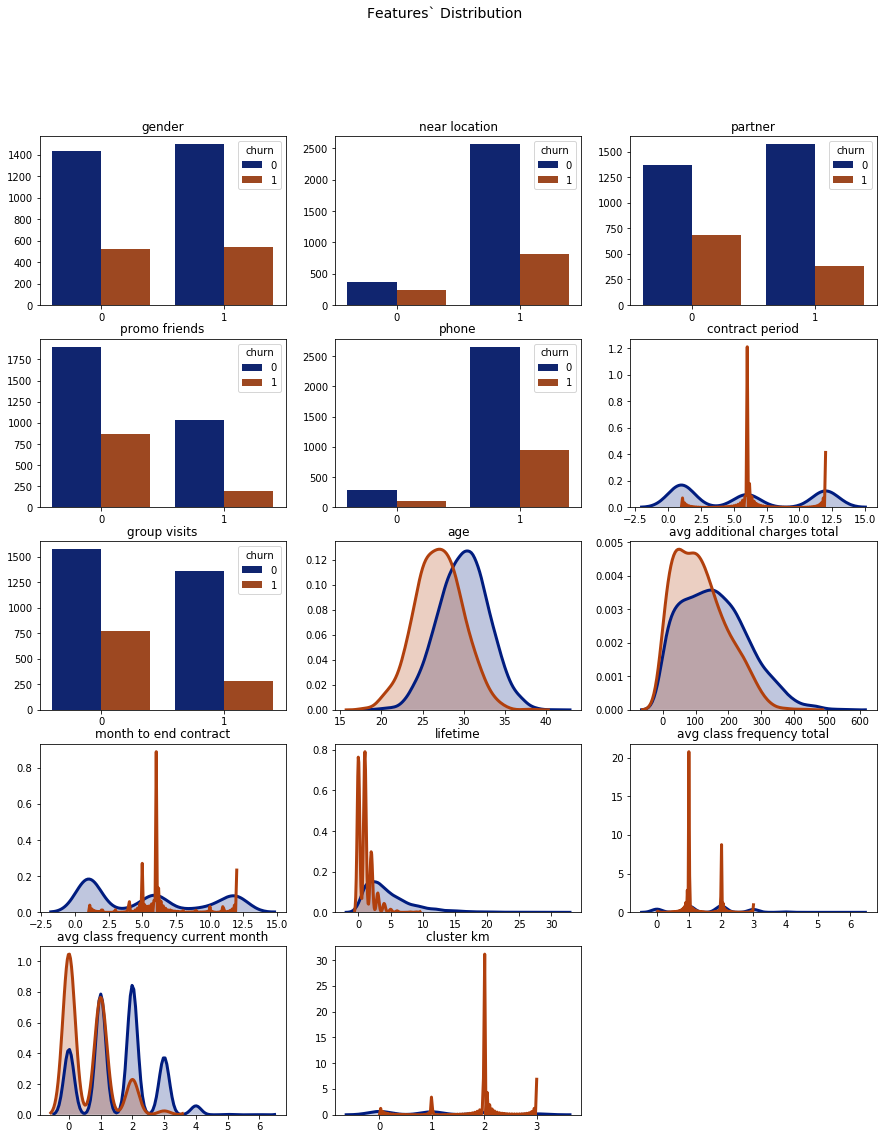

In [71]:
# ploting paired distribution feature-traget variable diagrams for each feature
sns.set_palette('dark')
plt.figure(figsize=(15,18))
the_grid = GridSpec(5, 3)
for i,column in enumerate(data.drop('churn', axis=1).columns):
    plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
    if data[column].unique().sum() == 1:
        sns.countplot(x=column, hue='churn', data=data)
        plt.xlabel('')
        plt.ylabel('')
    if data[column].unique().sum() > 1:
        sns.distplot(data[data['churn'] == 0][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(data[data['churn'] == 1][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        plt.xlabel('')
        plt.ylabel('')

plt.suptitle('Features` Distribution', fontsize = 14)
plt.show() 

The graphs visually confirm our observations made from the numerical analysis above.

The distribution is more or less normal.

# <a id='correlation.'></a>

**Building and render a correlation matrix**

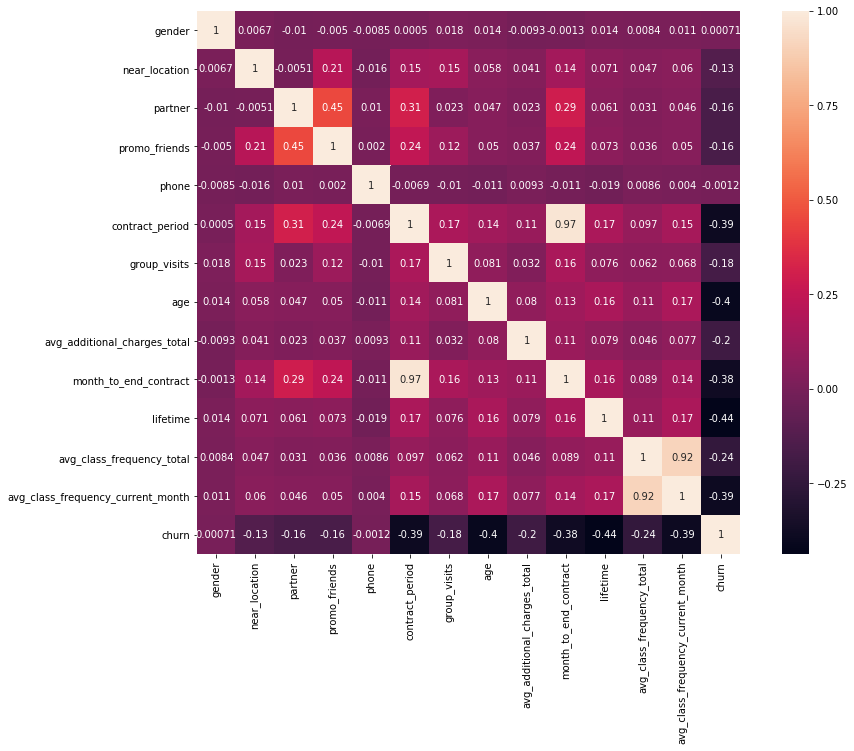

In [28]:
# building and render a correlation matrix
cm = data.corr()

plt.figure(figsize=(15,10))
# plotting an annotated heatmap for the correlation matrix
sns.heatmap(cm, annot = True, square=True) 
plt.show()

We have a 2 pairs of correlated features: 
avg_class_frequency_total + avg_class_frequency_current_month = 0.95 and contract_period + month_to_end_contract = 0.97.

# <a id='Data-split.'></a>

# <a id='Data-split.'></a>

# Step 3. Build a model to predict user churn

In [29]:

# divide the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis = 1)
y = data['churn']

#dividing the data into train and validation sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# <a id='Train-set.'></a>

**Training the model on the train with the logistic regression:**


In [30]:

# defining the model's algorithm 
lr_model = LogisticRegression() 

# training the model
lr_model.fit(X_train, y_train)

# using the trained model to make forecasts
lr_predictions = lr_model.predict(X_test) 
lr_probabilities = lr_model.predict_proba(X_test)[:,1]



**Training the model on the train with the random forest**


In [32]:
    
# defining the algorithm for the random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# training the random forest model
rf_model.fit(X_train, y_train)

# using the trained model to make predictions
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
    

# <a id='Data-metrics'></a>

**Evaluate accuracy, precision, and recall for both models using the validation data**

In [34]:
# defining the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

# printing all metrics for logistic regression
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')
# printing all metrics for random forest
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')


Metrics for logistic regression:
	Accuracy: 0.91
	Precision: 0.81
	Recall: 0.81
	F1: 0.81
	ROC_AUC: 0.96
Metrics for random forest:
	Accuracy: 0.91
	Precision: 0.81
	Recall: 0.82
	F1: 0.81
	ROC_AUC: 0.95


Accuracy - The two models have the same level (81%) of the share of accurate predictions among all predictions in.

Precision -  The two models have the same level(81%) share of predictions in class 1 are true. 

Recall - emonstrates the number of real class 1 objects you were able to discover with your model.

F1 score - Since precision and recall are aimed at avoiding opposing risks, we need a harmonizing metric that takes into account the balance between the metrics.In the second model, this level is one percent higher.

ROC_AUC - evaluate the quality of a classifier (a classification model).In the first model, this metric is a bit higher.

With such similar players, it is very difficult to judge which model is better. Both can be used.



# <a id='Stanardize-data.'></a>

# Step 4. Create user clusters

**Standardizing the data**

In [37]:
# creating a scaler class object (normalizer)
X = data.drop('churn', axis = 1)
sc = StandardScaler()
X_sc = sc.fit_transform(X)




# <a id='Matrix-of-distances.'></a>

**Building a matrix of distances based on the standardized feature matrix and plot a dendrogram.**

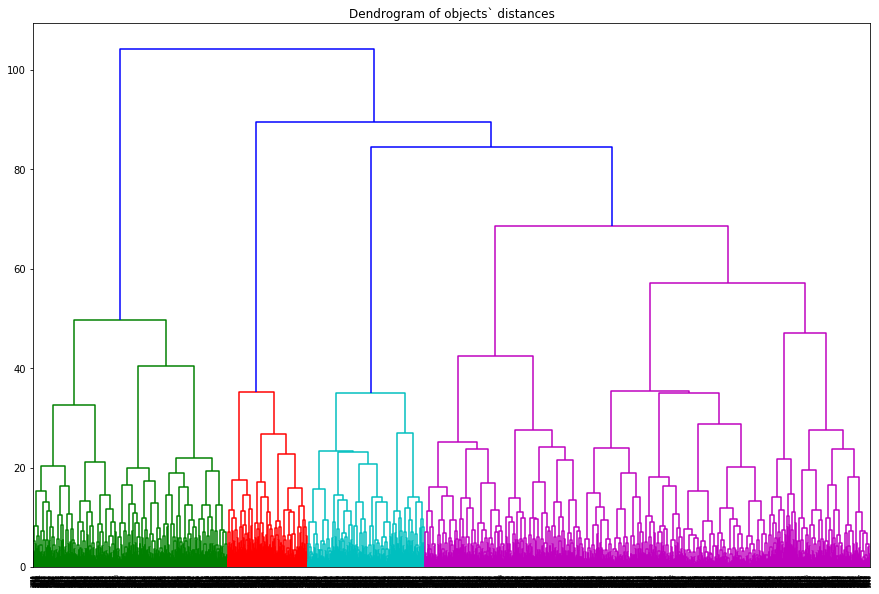

In [36]:
# putting the table with the linked bundles of objects to variable linked
linked = linkage(X_sc, method = 'ward') 
# plotting a dendrogram with linked variable:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

The optimal number of clusters (4) corresponds to the 4 different colors on the plot.

# <a id='K-means.'></a>

**Training the clustering model with the K-means algorithm and predict customer clusters.**

In [44]:
# setting the number of clusters as 4
km = KMeans(n_clusters = 4, random_state=0) 

 # applying the algorithm to the data and forming a cluster vector 
labels = km.fit_predict(X_sc)

# storing cluster labels into the field of our dataset
data['cluster_km'] = labels

# <a id='Mean-values.'></a>

**Checking the mean feature values for clusters.**

In [45]:
data.groupby(['cluster_km']).mean().reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.506126,0.941565,0.770028,0.563619,1.0,10.784166,0.542884,29.880302,161.195489,9.837889,4.750236,1.466541,1.448633,0.032988
1,1,0.538153,0.850402,0.378514,0.213855,1.0,2.567269,0.430723,29.850402,155.473415,2.393574,4.580321,2.360442,2.364458,0.093373
2,2,0.491972,0.771997,0.366731,0.195890,1.0,1.850996,0.307643,28.255620,132.453834,1.763006,2.425177,0.755941,0.527938,0.533076
3,3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.378238,1.290155,0.266839


Each cluster has distinctive features:

•	1(0)-has the highest level of 'near_location'+'partner'+'promo_friends'+'contract_period'+ group_visits'+ 'avg_additional_charges_total'+ 'month_to_end_contract'+'lifetime' and dthe lowest churn rate.

•	2(1)-has the highest level of 'avg_class_frequency_total'+'avg_class_frequency_current_month' - the churn date is 1%	

•	3(2)- has the lowest rate of 'near_location'+ 'partner'+'promo_friends'+ 'month_to_end_contract'+ 'contract_period' + group_visits'+ 'avg_additional_charges_total' and the highest churn rate 53%

•	4(3)- doesnt leave phone number - churn rate is 27%. 



# <a id='Distributions.'></a>

**Ploting distributions of features for the clusters.**

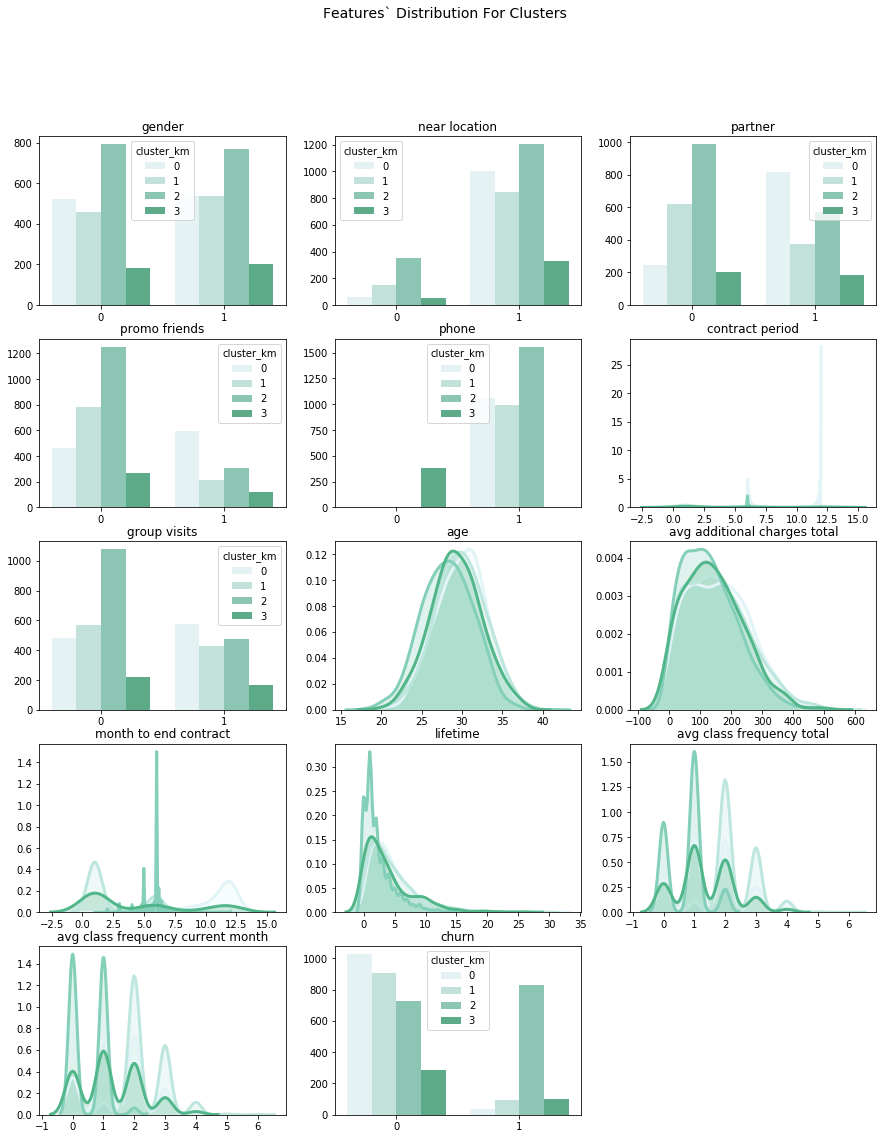

In [55]:
sns.set_palette('BuGn')
plt.figure(figsize=(15,18))
the_grid = GridSpec(5, 3)
for i,column in enumerate(data.drop('cluster_km', axis=1).columns):
    plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
    if data[column].unique().sum() == 1:
        sns.countplot(x=column, hue='cluster_km', data=data)
        plt.xlabel('')
        plt.ylabel('')     
    
 
    if data[column].unique().sum() > 1:
        sns.distplot(data[data['cluster_km'] == 0][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(data[data['cluster_km'] == 1][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(data[data['cluster_km'] == 2][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(data[data['cluster_km'] == 3][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        
        plt.xlabel('')
        plt.ylabel('')
 
plt.suptitle('Features` Distribution For Clusters', fontsize = 14)
#plt.tight_layout()
plt.show() 


The graphs visually discribe all of the above things that were presented in numbers.

# <a id='Churn-day.'></a>

**Calculation the churn rate for each cluster**

In [70]:
data_churn=data.groupby('cluster_km', as_index=False).agg({'churn' : 'mean'}).sort_values(by = 'churn',ascending=False)
data_churn.style.format({'churn':"{:.2%}"}).hide_index()

cluster_km,churn
2,53.31%
3,26.68%
1,9.34%
0,3.30%


The highest churn rate in cluster 2.
The lowerst churn rate in cluster 0.

**Step 5. Conclusions and basic recommendations on working with customers**

**Summing up:**

We can choose one of the proven models for predictions,since their metrics are the same and high:logistic regression or random forest.


Customers with the lowest churn rate have the following metrics: the highest level of 'near_location'+'partner'+'promo_friends'+'contract_period'+ group_visits'+ 'avg_additional_charges_total'+ 'month_to_end_contract'+'lifetime'.

Customers with the highest churn rate have the following metrics: the lowest rate of 'near_location'+ 'partner'+'promo_friends'+ 'month_to_end_contract'+ 'contract_period' + group_visits'+ 'avg_additional_charges_total'.

**I recommend:**
1. Create more promotions: bring a friend, thus more people will come through the recommendations of friends.

2. Sell more subscriptions for 3-12 months.

3. Increase the frequency of gym attendance by clients.

4. More conduct and involve clients in group sessions.


